In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

from torch.utils.data import Subset
from vqvaes.trainer import VQVAETrainer
from vqvaes.models import build_vqvae
from data.nouns import make_datasets, create_dataloader
import torchvision.transforms.v2 as v2
import matplotlib.pyplot as plt

/home/ubuntu/.cache/pypoetry/virtualenvs/vqvaes-Y5Ctg_tt-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ubuntu/.cache/pypoetry/virtualenvs/vqvaes-Y5Ctg_tt-py3.10/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
transform = v2.Compose([
    v2.Resize((128, 128)),
    v2.ToTensor()
])
train_set, test_set = make_datasets(transform=transform)
# make subset of trainset
train_set = Subset(train_set, range(10))
train_loader = create_dataloader(train_set, batch_size=32)
test_loader = create_dataloader(test_set, batch_size=32)

/home/ubuntu/.cache/pypoetry/virtualenvs/vqvaes-Y5Ctg_tt-py3.10/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


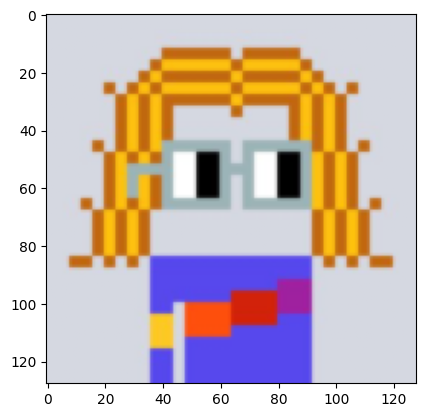

In [4]:
image = train_set[0]["image"]
plt.imshow(image.permute(1, 2, 0))

In [5]:
vqvae = build_vqvae(
    in_channels=3,
    num_channels=32,
    num_residual_blocks=1,
    num_residual_channels=16,
    codebook_size=512,
    codebook_dim=16,
)

trainer = VQVAETrainer(vqvae, train_loader, test_loader, lr=3e-4, iterations=100, device="cuda")

In [31]:
trainer.train()

  4%|▍         | 4/100 [00:00<00:02, 36.13it/s, loss=0.0169, perplexity=9.66, recon_loss=0.0087, vq_loss=0.00816] 

100%|██████████| 100/100 [00:02<00:00, 36.92it/s, loss=0.0127, perplexity=9.61, recon_loss=0.00618, vq_loss=0.00649]


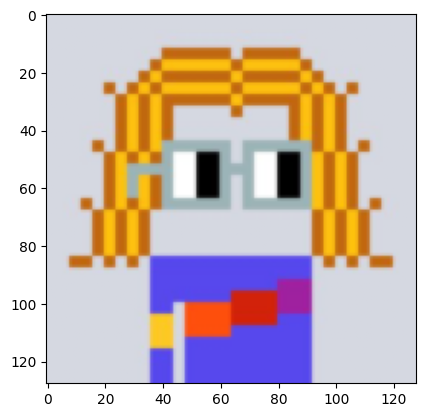

In [32]:
image = train_set[0]["image"]
plt.imshow(image.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13390735..1.1516368].


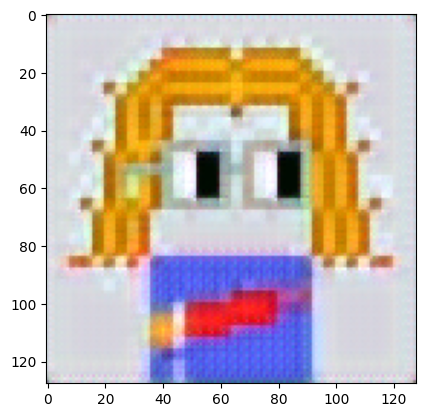

In [33]:
recon = vqvae(image.unsqueeze(0).cuda())[0].squeeze(0).detach().cpu()
plt.imshow(recon.permute(1, 2, 0))